# 沃尔玛销售数据

**简介：数据集包含沃尔玛的销售数据。沃尔玛全国范围内有多家零售门店在库存管理方面的问题，那么如何将供应与需求相匹配呢？目标：利用数据，提供有用的见解，并创建预测模型，从而能预测未来X个月/年的销售情况。**  

变量含义：
- Store：店铺编号
- Date：销售周
- Weekly_Sales：店铺在该周的销售额
- Holiday_Flag：是否为假日周
- Temperature：销售日的温度
- Fuel_Price：该地区的燃油成本
- CPI（消费者物价指数）：消费者物价指数
- Unemployment：失业率

**数据文件名：walmart_stores_data.csv**

In [1]:
import numpy as np
import pandas as pd

In [2]:
ws = pd.read_csv(r"C:\Users\LENOVO\Desktop\数据分析文件夹\[赠送] 练习数据集（持续更新）\walmart_stores_data.csv")

In [3]:
ws.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
ws["Date"].value_counts()

Date
05-02-2010    45
12-02-2010    45
19-02-2010    45
26-02-2010    45
05-03-2010    45
              ..
28-09-2012    45
05-10-2012    45
12-10-2012    45
19-10-2012    45
26-10-2012    45
Name: count, Length: 143, dtype: int64

首先我们要对数据进行清洗：
当前数据满足：每行是一个实例，每列是一个变量，每个单元格是一个值的要求。
接下来我们也要从：  
> 1、空数据；  
> 2、重复数据；  
> 3、不一致数据；  
> 4、无效数据。  

来评估数据的有效性。

## 空数据评估

**评估结果：无缺失数据，不需要处理**

In [5]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


从如上汇总信息上看，本次样本数据一共6435条，8个列中不存在缺失值。无需处理。  
但是Date的数据格式是str，我们需要将它处理成datatime格式

In [6]:
ws["Date"] = pd.to_datetime(ws["Date"], dayfirst=True)

In [7]:
ws["Date"].dtype

dtype('<M8[ns]')

In [8]:
ws

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [9]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## 重复数据评估

**评估结果：无重复数据，不需要处理**

In [10]:
ws.sample(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5068,36,2011-04-22,374574.72,0,74.57,3.805,214.192157,8.300
785,6,2011-06-10,1598643.65,0,84.49,3.648,216.584073,6.855
4938,35,2011-07-22,820188.42,0,82.28,3.811,139.796971,8.684
3156,23,2010-04-16,1288823.72,0,44.25,2.885,131.980900,5.435
2043,15,2010-11-19,608200.81,0,44.10,3.138,132.917200,8.067
3040,22,2010-10-22,960998.52,0,50.24,2.919,136.688871,8.572
5248,37,2012-01-06,558343.57,0,57.18,3.157,218.406288,7.244
751,6,2010-10-15,1344580.92,0,68.93,2.720,213.333798,7.007
1746,13,2010-09-03,1911852.58,0,65.71,2.868,126.101935,7.951
2146,16,2010-02-12,472044.28,1,20.87,2.572,189.464272,7.039


由于需求中没有明确指出哪一项具有唯一性，也就是说这些数据全部都允许重复。但从统计数据样本角度出发，如果存在Date和Store同时重复情况，将对统计分析毫无贡献，接下来我们要对Store和Date同时重复的情况进行评估

In [11]:
ws[ws.duplicated(subset=["Store","Date"])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


这两项同时重复的情况不存在，无需处理。

## 不一致数据评估

**评估结果：不存在不一致数据，不用处理**

In [12]:
ws.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4598,33,2010-07-09,302423.93,0,95.88,3.100,126.151800,9.495
627,5,2011-02-25,294659.50,0,63.35,3.065,214.095550,6.634
1201,9,2011-03-11,517783.50,0,54.75,3.459,217.697733,6.416
6314,45,2010-07-09,787062.00,0,82.45,2.793,182.256960,8.743
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
2178,16,2010-09-24,511330.32,0,58.19,2.793,190.571326,6.868
1899,14,2010-11-12,2092189.06,0,46.14,2.931,182.991613,8.724
2000,14,2012-10-19,1590274.72,0,56.47,3.969,192.330854,8.667
5057,36,2011-02-04,417521.70,0,46.68,2.980,211.333375,8.395
310,3,2010-07-23,352864.49,0,83.32,2.608,214.556497,7.346


从样本数据来看，基本都是由数字组成，没有文字表述不一致的情况存在，但我们需要对Store进行category转换，查看Store下的数据是否一致

In [13]:
ws["Store"].astype("category")

0        1
1        1
2        1
3        1
4        1
        ..
6430    45
6431    45
6432    45
6433    45
6434    45
Name: Store, Length: 6435, dtype: category
Categories (45, int64): [1, 2, 3, 4, ..., 42, 43, 44, 45]

In [14]:
ws["Store"].value_counts()

Store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: count, dtype: int64

In [15]:
ws["Holiday_Flag"].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

样本数据不存在不一致数据，不用处理。

## 无效数据评估

**评估结果：所有样本数据均有效合理，不需要处理**

In [16]:
ws.sample(6)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1624,12,2011-01-28,873119.06,0,50.74,3.342,127.580032,14.021
2350,17,2011-04-15,825283.43,0,39.98,3.616,128.910733,6.774
5421,38,2012-08-03,469311.17,0,88.16,3.760,130.737871,10.926
4381,31,2011-11-04,1426405.46,0,56.01,3.332,217.485361,7.441
1047,8,2010-12-24,1511641.09,0,45.67,2.886,214.747907,6.433
3923,28,2011-04-15,1240126.07,0,57.63,3.868,128.910733,13.736


无效数据可能出现在：  
> 1.Store要>0;  
> 2.Date要小于等于当前日期：2025-04-08；  
> 3.Weekly_Sales、Fuel_Price、CPI和Unemployment不能小于0；  
> 4.-22℉<Temperature<=104℉(根据全国正常气温情况，一般温度在-30——40℃度之间，折算成华氏度是-22℉——104华氏度，超出这个范围属于极端天气，我们在这里将视为无效数据)  
> 5.Holiday_Flag只允许0和1存在，我们可以通过ws["Holiday_Flag"]value_counts()进行查看

In [17]:
ws.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [18]:
ws.query('Store <= 0')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


*不存在Store小于等于0的情况*

In [19]:
ws.query('Date >= "2025-04-08"')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


*不存在Date大于当前日期的情况*

In [20]:
ws.query('Weekly_Sales < 0')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [21]:
ws.query('Fuel_Price < 0')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [22]:
ws.query('CPI < 0')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [23]:
ws.query('Unemployment < 0')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


*不存在 Weekly_Sales、Fuel_Price、CPI和Unemployment小于0的情况*

In [24]:
ws.query('(Temperature<= -22)|(Temperature>= 104)')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


*不存在-22℉——104华氏度以外的数据，说明气温数据都是合理范围内的，不需要处理。*

In [25]:
ws["Holiday_Flag"].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

*Holiday_Flag只有0和1两项数据，不需要处理。*

存储新的数据文件为：walmart_stores_data_cleaned.csv

In [26]:
ws.to_csv(r"C:\Users\LENOVO\Desktop\数据分析文件夹\我的数据分析文件夹\数据清洗与整理\清洗后数据\沃尔玛销售数据\walmart_stores_data_cleaned1.csv", index=False)

In [27]:
ws.groupby(["Temperature", "Store", "Date"])[["Weekly_Sales"]].sum()

Weekly_Sales
Temperature Store Date                    
-2.06       7     2011-02-04     558027.77
 5.54       26    2011-01-28     817485.14
 6.23       17    2011-01-07    1083071.14
 7.46       7     2012-01-13     593875.46
 9.51       40    2011-01-28     775910.43
...                                    ...
 99.22      28    2010-07-23    1205884.98
            38    2010-07-23     328336.85
 99.66      33    2011-08-26     237095.82
 100.07     33    2012-08-10     297753.49
 100.14     33    2010-07-16     280937.84

[6435 rows x 1 columns]

## 数据可视化分析

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
wsd = pd.read_csv(r"C:\Users\LENOVO\Desktop\数据分析文件夹\我的数据分析文件夹\数据清洗与整理\清洗后数据\沃尔玛销售数据\walmart_stores_data_cleaned.csv")

In [30]:
wsdc = wsd.copy()

In [31]:
wsdc.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3036,22,2010-09-24,902779.25,0,65.14,2.718,136.631782,8.433
459,4,2010-09-03,1935857.58,0,76.80,2.584,126.101935,7.372
4348,31,2011-03-18,1425559.02,0,63.26,3.488,214.015624,8.028
3148,23,2010-02-19,1319588.04,0,26.70,2.747,131.637000,5.892
3372,24,2011-09-09,1527455.19,1,68.32,3.930,136.274581,8.358
6080,43,2011-07-08,651147.83,0,87.02,3.480,207.115274,10.641
1368,10,2011-08-26,1728399.07,0,91.59,3.663,129.283258,8.257
4703,33,2012-07-13,287033.64,0,97.60,3.723,130.683000,7.147
4740,34,2010-07-02,919229.36,0,73.66,2.668,126.139200,9.816
5566,39,2012-08-17,1720221.91,0,84.72,3.571,220.719961,6.623


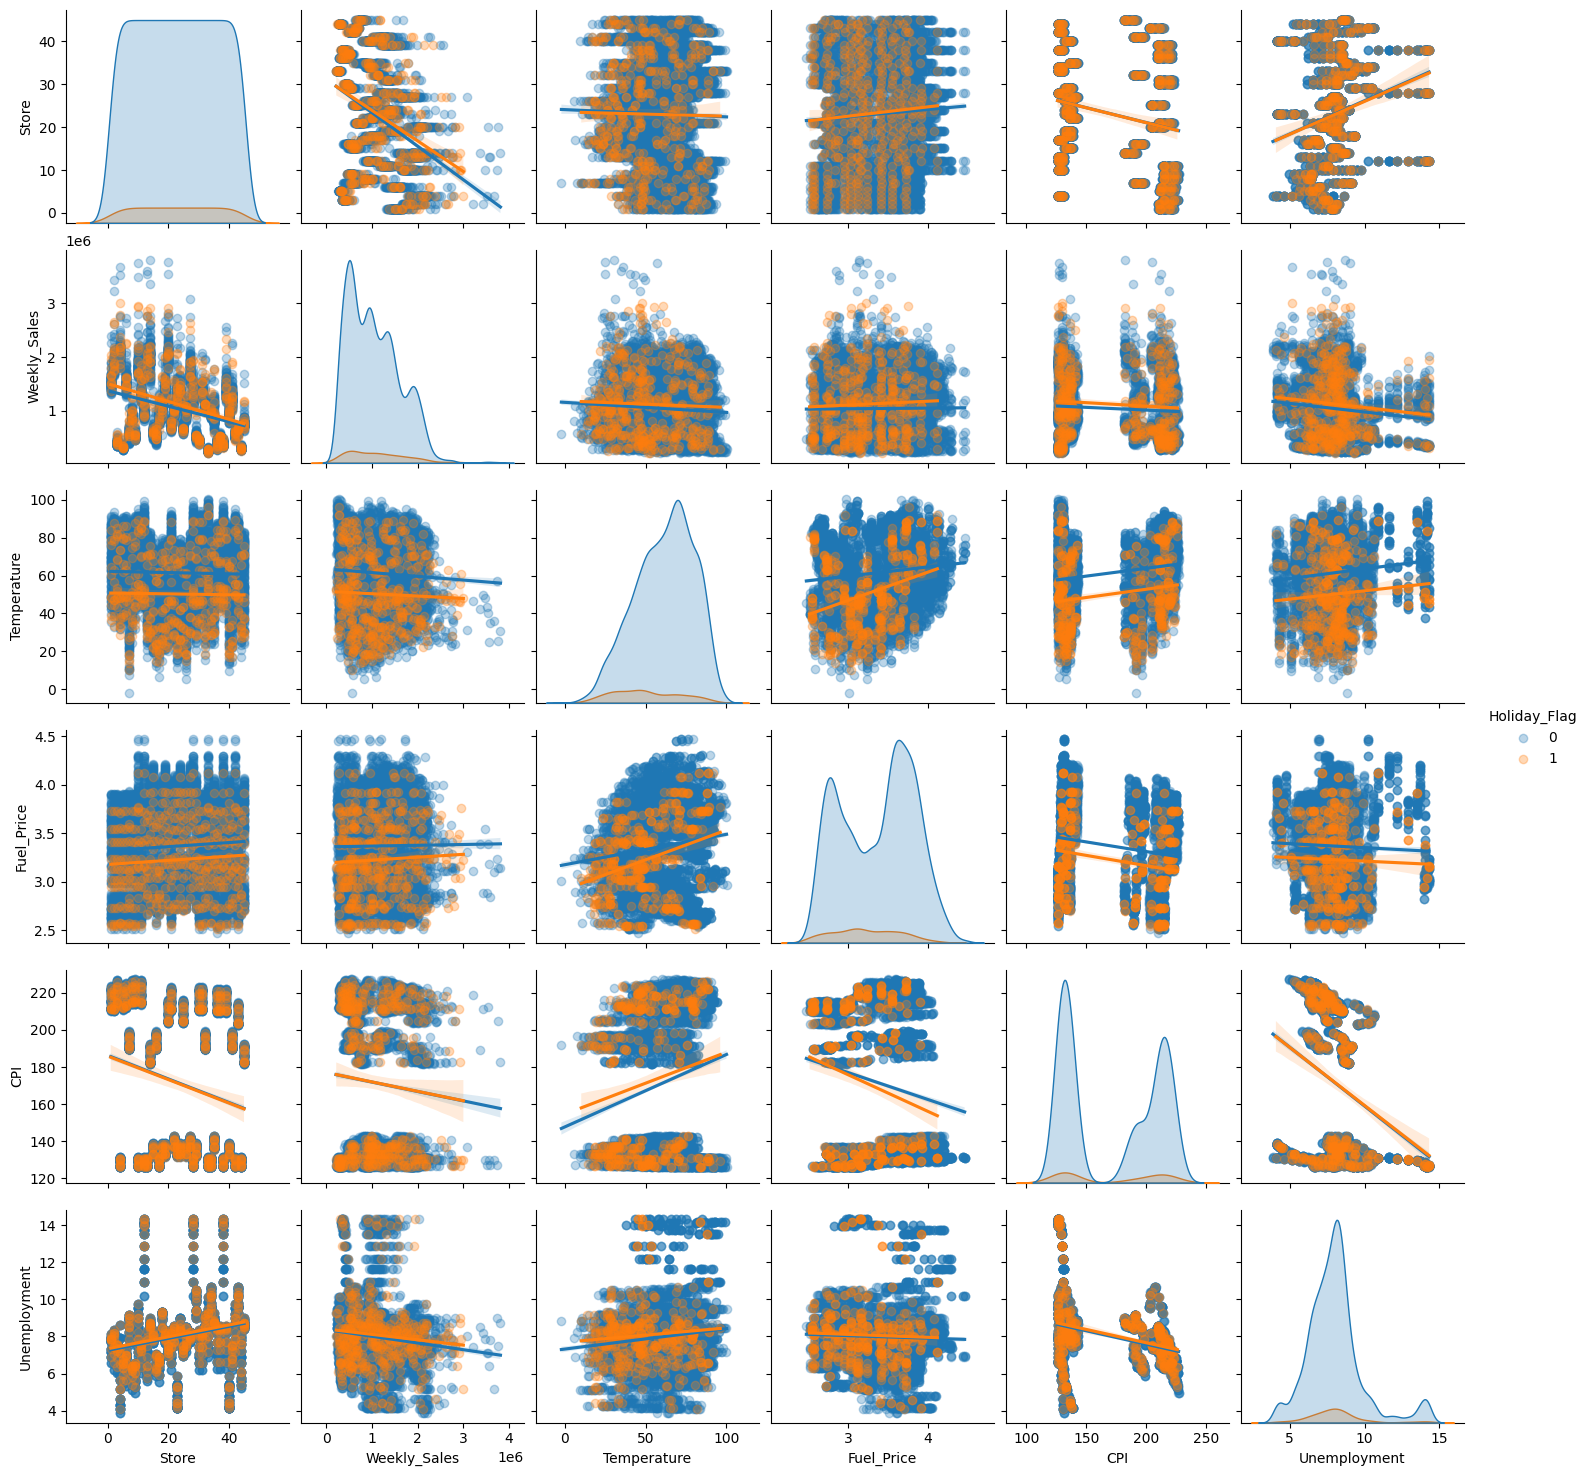

In [32]:
sns.pairplot(wsdc, hue="Holiday_Flag", kind="reg", plot_kws={"scatter_kws" : {"alpha" : 0.3}})
plt.show()

In [33]:
wsdc.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


从上图中我们可以看出一些问题：
> 1.Weekly_Sales、Fuel_Price、CPI、Unemployment均存在多峰情况，说明可能来自不同数据。  
> 2.CPI是一个影响比较大的变量，两极分化比较严重。
> 3.从图上看，Fuel_Price与Weekly_Sales没有必然联系。不用单独分析。
> 4.Unemployment与Weekly_Sales存在一定关联，当Unemployment超过10以后，Weekly_Sales均会在200w以下，说明此时消费者购买力下滑。  
总体看，各变量之间有明显的线性趋势，密度图呈正态分布，说明数据没有极值。

下面我们将分别单独分析Weekly_Sales与Holiday_Flag、Temperature、Fuel_Price、CPI、Unemployment，探索他们与周销售额之间的关系。

In [34]:
price = wsdc.groupby(["Store"])["Weekly_Sales"].sum()
store_index = wsdc["Store"].value_counts().index
store_index
df_price_store = pd.DataFrame({"price":price, "store":store_index})

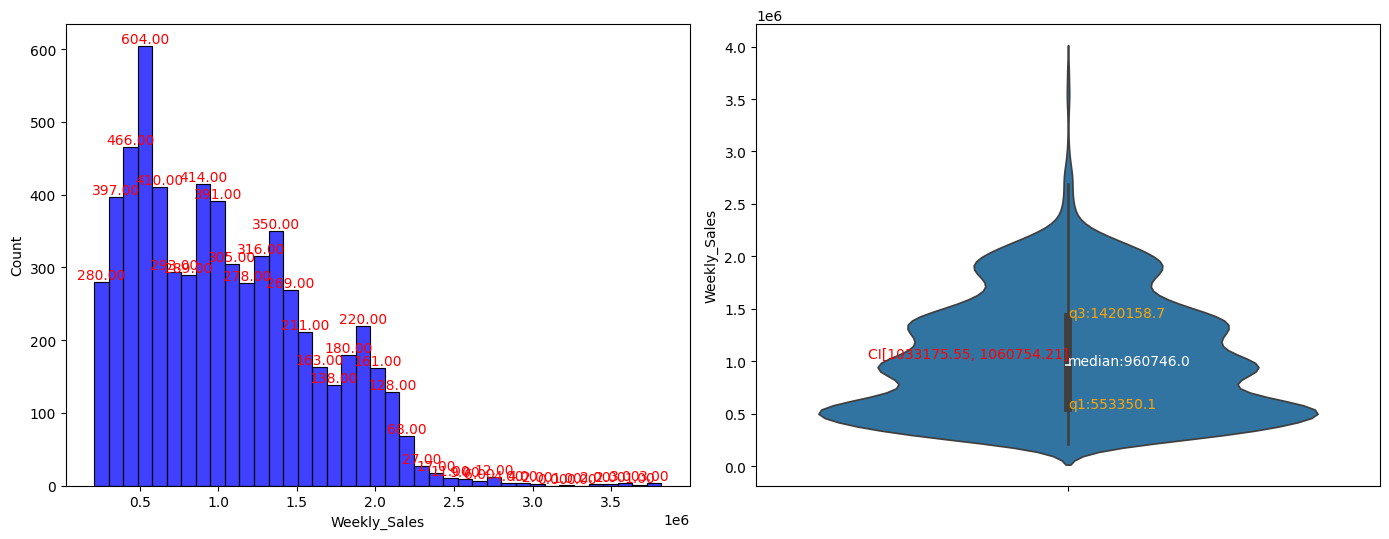

In [35]:
## Weekly_Sales的分布情况
plt.rcParams["figure.figsize"]=[7.00, 3.50]
plt.rcParams["figure.autolayout"]=True
figure, axes = plt.subplots(1, 2, figsize=(14,5.5))
sns.violinplot(wsdc, y="Weekly_Sales", ax=axes[1])
median=wsdc["Weekly_Sales"].median()
q1 = wsdc["Weekly_Sales"].quantile(0.25)
q3 = wsdc["Weekly_Sales"].quantile(0.75)
CI = [wsdc["Weekly_Sales"].mean() - 1.96*wsdc["Weekly_Sales"].std()/np.sqrt(len(wsdc["Weekly_Sales"])), wsdc["Weekly_Sales"].mean() + 1.96*wsdc["Weekly_Sales"].std()/np.sqrt(len(wsdc["Weekly_Sales"]))]
plt.text(0, median, f"median:{median:.1f}", color="white")
plt.text(0, q1, f"q1:{q1:.1f}", color="orange")
plt.text(0, q3, f"q3:{q3:.1f}", color="orange")
plt.text(0, CI[0], f"CI[{CI[0]:.2f}, {CI[1]:.2f}]", horizontalalignment="right", color="red")
a = sns.histplot(wsdc, x="Weekly_Sales", ax=axes[0], color="blue")
for i in a.patches:
    a.annotate(f"{i.get_height():.2f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="red")
plt.show()

图形呈现右偏态，说明大部分数据在左侧，有极少部分数据较大，拉高了均值，使得均值大于中值。

In [36]:
wsdc.sample()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5347,38,2011-03-04,405429.43,0,51.72,3.674,128.26475,14.021


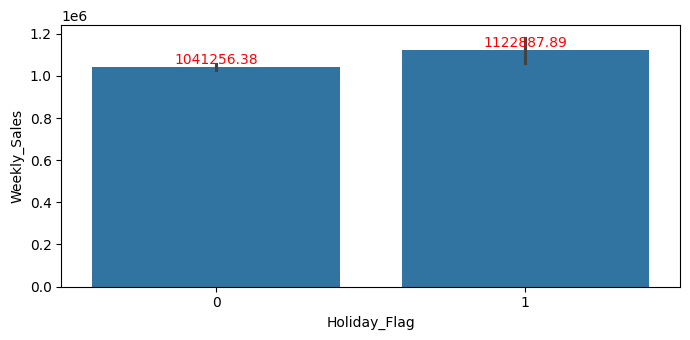

In [37]:
## Weekly_Sales与Holiday_Flag
a = sns.barplot(wsdc, x="Holiday_Flag", y="Weekly_Sales", estimator="mean")
for i in a.patches:
    a.annotate(f"{i.get_height():.2f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="red")
plt.show()

节假日的周销售额平均值比非节假日的周销售额平均值多，两者差距并不大，说明Weekly_Sales与Holiday_Flag之间的影响不大。

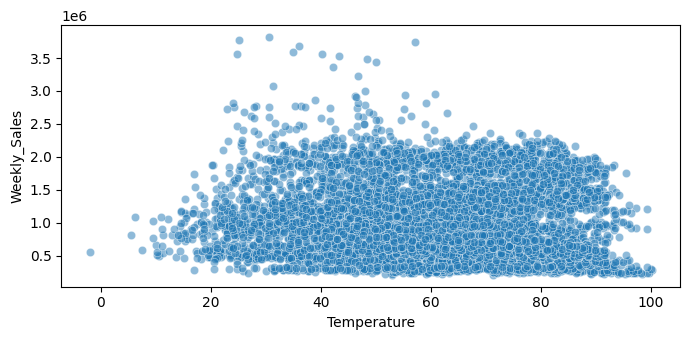

In [38]:
## Weekly_Sales与Temperature
sns.scatterplot(wsdc, y="Weekly_Sales", x="Temperature", alpha=0.5)
plt.show()

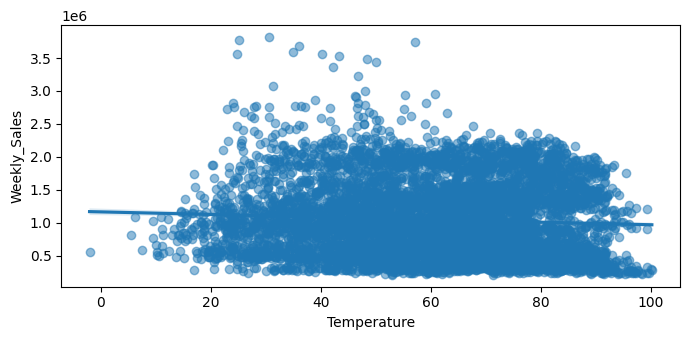

In [39]:
sns.regplot(wsdc, y="Weekly_Sales", x="Temperature", scatter_kws={"alpha": 0.5})
plt.show()

大部分销售额集中在（0.2-2.3）le6之间，当温度在20-90℉范围内时，周销售额相对稳定。当超出这个温度范围后，销售额数据明显减少。  
在24-60℉之间，出现部分高销售额的数据。

In [40]:
wsdc["Temperature"].value_counts()

Temperature
50.43    11
67.87    10
76.03     9
76.67     9
70.28     9
         ..
59.98     1
62.52     1
65.88     1
68.78     1
62.27     1
Name: count, Length: 3528, dtype: int64

通过统计Temperature的数值看到，关于数值的统计有3528条，我们将这些温度数据通过cut划分出温度范围：极寒、低温、温度较低、温度适宜、温度较高、高温、极端高温七个范围。

In [41]:
temperature_bin = [-30, 20, 32, 50, 77, 95, 200]
temperature_label = ["极寒", "低温", "较低温", "适宜温度", "较高温", "极端高温"]
wsdc["TemperatureLabel"] = pd.cut(wsdc["Temperature"],temperature_bin, labels=temperature_label)
wsdc.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,TemperatureLabel
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,较低温
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,较低温
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,较低温
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,较低温
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,较低温


In [42]:
wsdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Store             6435 non-null   int64   
 1   Date              6435 non-null   object  
 2   Weekly_Sales      6435 non-null   float64 
 3   Holiday_Flag      6435 non-null   int64   
 4   Temperature       6435 non-null   float64 
 5   Fuel_Price        6435 non-null   float64 
 6   CPI               6435 non-null   float64 
 7   Unemployment      6435 non-null   float64 
 8   TemperatureLabel  6435 non-null   category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 408.8+ KB


In [43]:
wsdc["TemperatureLabel"].value_counts()

TemperatureLabel
适宜温度    3211
较低温     1340
较高温     1331
低温       429
极寒        86
极端高温      38
Name: count, dtype: int64

In [44]:
ls = wsdc.groupby("TemperatureLabel",observed=True)[["Weekly_Sales"]].sum()

In [45]:
ls.reset_index(inplace = True)
ls

,TemperatureLabel,Weekly_Sales
0,极寒,7.274178e+07
1,低温,4.684808e+08
2,较低温,1.492362e+09
3,适宜温度,3.377351e+09
4,较高温,1.306020e+09
5,极端高温,2.026284e+07


In [46]:
import matplotlib
from matplotlib.font_manager import FontManager
fm_font = set(f.name for f in FontManager().ttflist)
for i in sorted(fm_font):
    print(i)

Agency FB
Algerian
Arial
Arial Rounded MT Bold
Bahnschrift
Baskerville Old Face
Bauhaus 93
Bell MT
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Blackadder ITC
Bodoni MT
Book Antiqua
Bookman Old Style
Bookshelf Symbol 7
Bradley Hand ITC
Britannic Bold
Broadway
Brush Script MT
Calibri
Californian FB
Calisto MT
Cambria
Candara
Castellar
Centaur
Century
Century Gothic
Century Schoolbook
Chiller
Colonna MT
Comic Sans MS
Consolas
Constantia
Cooper Black
Copperplate Gothic Bold
Copperplate Gothic Light
Corbel
Courier New
Curlz MT
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
DengXian
Dubai
Ebrima
Edwardian Script ITC
Elephant
Engravers MT
Eras Bold ITC
Eras Demi ITC
Eras Light ITC
Eras Medium ITC
FZShuTi
FZYaoTi
FangSong
Felix Titling
Footlight MT Light
Forte
Franklin Gothic Book
Franklin Gothic Demi
Franklin Gothic Demi Cond
Franklin Gothic Heavy
Franklin Gothic Medium
Franklin Gothic Medium Cond
Freestyle Script
French Script MT
Gabriola
Gadug

In [47]:
matplotlib.rc("font", family="SimHei")

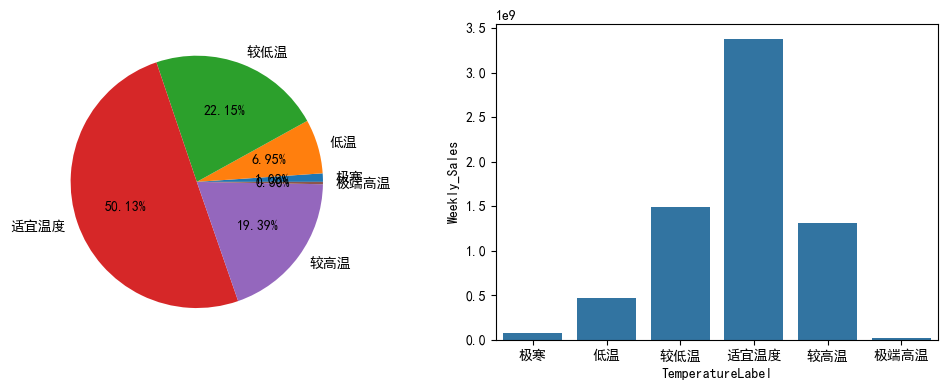

In [48]:
figure, axes = plt.subplots(1, 2, figsize=(10,4))
sns.barplot(ls, x="TemperatureLabel", y="Weekly_Sales", ax=axes[1])
axes[0].pie(ls["Weekly_Sales"], labels=ls["TemperatureLabel"], autopct="%.2f%%")
plt.show()


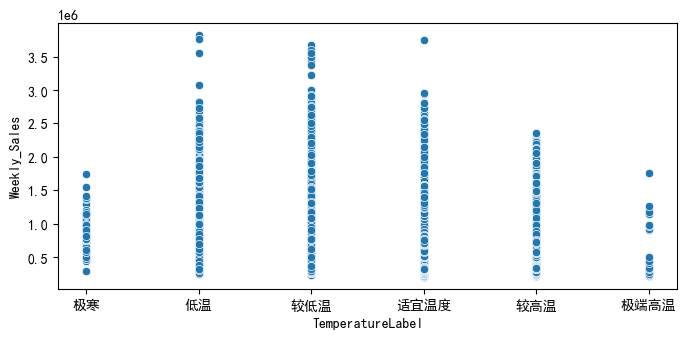

In [49]:
sns.scatterplot(wsdc, x="TemperatureLabel", y="Weekly_Sales")
plt.show()

如图所示，温度对销售额的影响比较明显，因为分类缺少高温，导致图形呈现弱左偏态，但实际应该是正太分布。  
适宜温度人们出行较多，销售额最大。当温度趋于较低或较高温度时，销售额降低了一半。
现状图显示：当温度较低或者低温时，出现了高消费趋势，猜测有囤货行为。极寒和极高温时周销售额最低。
人们不喜欢高温，如果极端天气出行，客户更喜欢低温。  
通过点状图和条形图对比分析，虽然低温和较低温时，总销售额下降，但部分地区的超市的周销售额会增加至平时的好几倍。这可能跟其他因素比如燃油附加费是否增加等因素有关系，需要我们后续分析后才能确定结论。

In [50]:
wsdc.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,TemperatureLabel
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,较低温
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,较低温
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,较低温
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,较低温
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,较低温


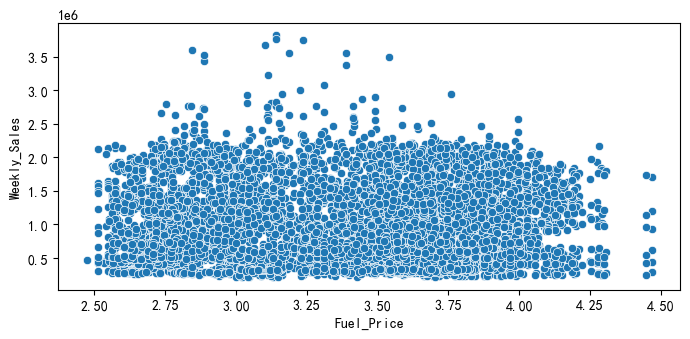

In [51]:
## Weekly_Sales与Fuel_Price
sns.scatterplot(wsdc, y="Weekly_Sales", x="Fuel_Price")
plt.show()

从图上看，燃油成本对周销售额并没有明显的直接影响。虽然在4.25-4.50之间没有出现数据，但4.50处仍然有销售数据。

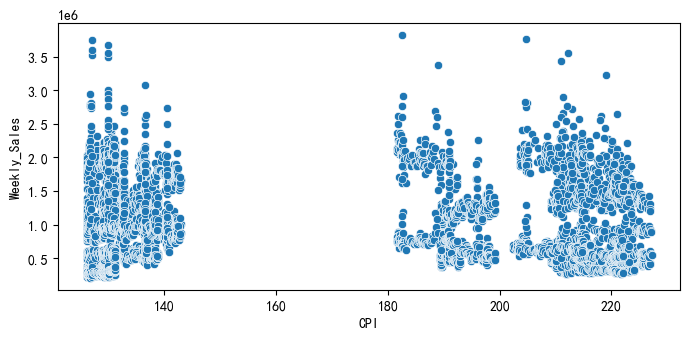

In [52]:
## Weekly_Sales与CPI
sns.scatterplot(wsdc, y="Weekly_Sales", x="CPI")
plt.show()

In [53]:
wsdc.query('(CPI > 145) & (CPI <180)')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,TemperatureLabel


CPI对销售额的影响比较明显，0-145、210-225这两个范围内，销售额比较集中，大多数销售额集中在0-2.5le6之间。CPI在180-200之间时，销售额比较发散，而CPI在145-180之间时，基本没有销售额产生,经过对数据的筛查，发现样本中不含这部分数据。  
结论:CPI对周销售额产生的影响不大，但CPI越大，销售数据越少，说明购买力有所降低。

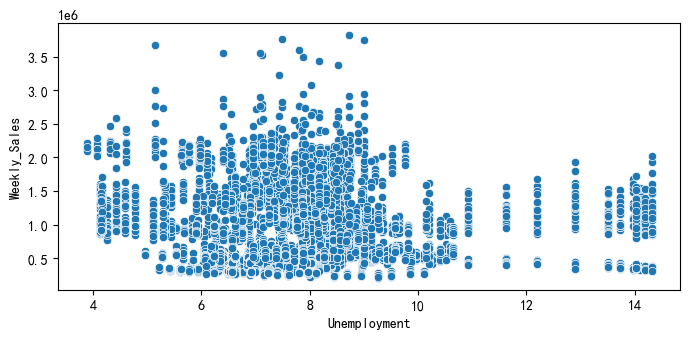

In [54]:
## Weekly_Sales与Unemployment
sns.scatterplot(wsdc, y="Weekly_Sales", x="Unemployment")
plt.show()

失业率对销售额的影响比较明显。失业率在4-9之间时，销售额数据比较多。当失业率上升后，从11开始，销售额数据明显减少，也没有较高销售额数据出现。说明购买力下降。  
结论:当失业率超过11后，与周销售额成反比。小于11时没有明显影响。

## 分析数据

我们此次的目标是通过对相关数据的分析，找出周销售额与这些变量之间的联系，从而创建模型，预测之后销售额数据。从而为库存提供参考。  
首先为了避免误操作，我们先创建一个copy文件，名字为lr_wsdc

In [55]:
lr_wsdc = wsdc.copy()

In [56]:
lr_wsdc["Date"] = pd.to_datetime(lr_wsdc["Date"])
lr_wsdc["Store"] = lr_wsdc["Store"].astype("category")

In [57]:
lr_wsdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Store             6435 non-null   category      
 1   Date              6435 non-null   datetime64[ns]
 2   Weekly_Sales      6435 non-null   float64       
 3   Holiday_Flag      6435 non-null   int64         
 4   Temperature       6435 non-null   float64       
 5   Fuel_Price        6435 non-null   float64       
 6   CPI               6435 non-null   float64       
 7   Unemployment      6435 non-null   float64       
 8   TemperatureLabel  6435 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(5), int64(1)
memory usage: 366.2 KB


In [58]:
lr_wsdc[lr_wsdc["TemperatureLabel"].isna()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,TemperatureLabel


In [59]:
lr_wsdc.groupby(["TemperatureLabel", "Store", "Date"], observed=True)[["Weekly_Sales"]].sum()

Weekly_Sales
TemperatureLabel Store Date                    
极寒               7     2010-02-05     496725.44
                       2010-11-26     835189.26
                       2010-12-31     729572.08
                       2011-01-07     661163.94
                       2011-01-14     547384.90
...                                         ...
极端高温             38    2010-07-23     328336.85
                       2010-07-30     336378.38
                       2012-07-13     416036.75
                       2012-08-10     436690.13
                 42    2011-07-01     506343.83

[6435 rows x 1 columns]

In [60]:
start_date = lr_wsdc["Date"].min()
lr_wsdc["DateNum"] = (lr_wsdc["Date"] - start_date).dt.days
lr_wsdc

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,TemperatureLabel,DateNum
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,较低温,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,较低温,7
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,较低温,14
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,较低温,21
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,较低温,28
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,适宜温度,966
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,适宜温度,973
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,适宜温度,980
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,适宜温度,987


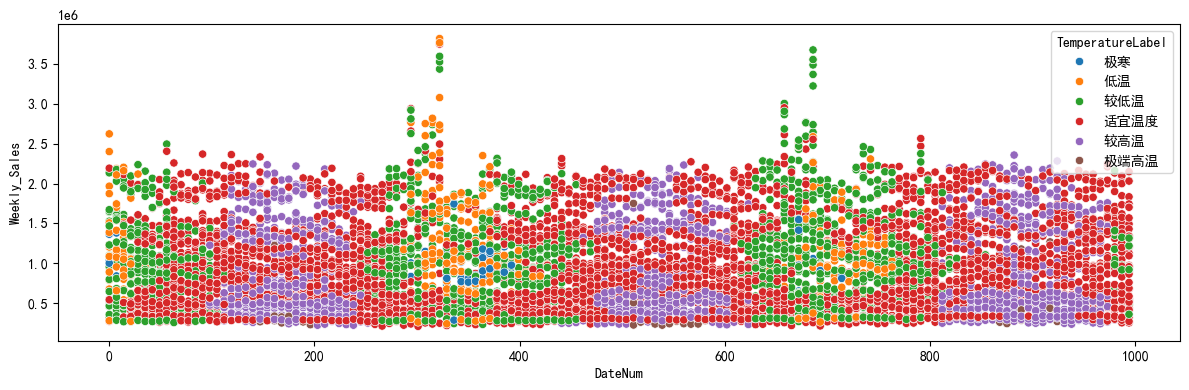

In [61]:

plt.figure(figsize=(12,4))
sns.scatterplot(lr_wsdc, x="DateNum", y="Weekly_Sales", hue="TemperatureLabel")
plt.show()

In [62]:
lr_wsdc.sample(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,TemperatureLabel,DateNum
252,2,2012-03-09,1937628.26,0,57.11,3.669,220.697433,7.057,适宜温度,763
5920,42,2011-03-11,607294.56,0,64.22,3.630,128.399500,8.744,适宜温度,399


TemperatureLabel是我在分析过程中自行添加的一个分类变量，我们更需要具体温度数值来拟合，而不是温度范围。这样会降低拟合的r值。先将TemperatureLabel删除.  
同时.

In [63]:
lr_wsdc.drop(columns="TemperatureLabel", inplace=True)

In [64]:
lr_wsdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   DateNum       6435 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(5), int64(2)
memory usage: 410.0 KB


In [65]:
lr_wsdc

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateNum
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,7
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,21
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,28
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,966
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,973
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,980
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,987


In [66]:
store_1 = lr_wsdc.query('Store == 1')

In [67]:
store_1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateNum
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,7
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,21
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,28
...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,966
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,973
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,980
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,987


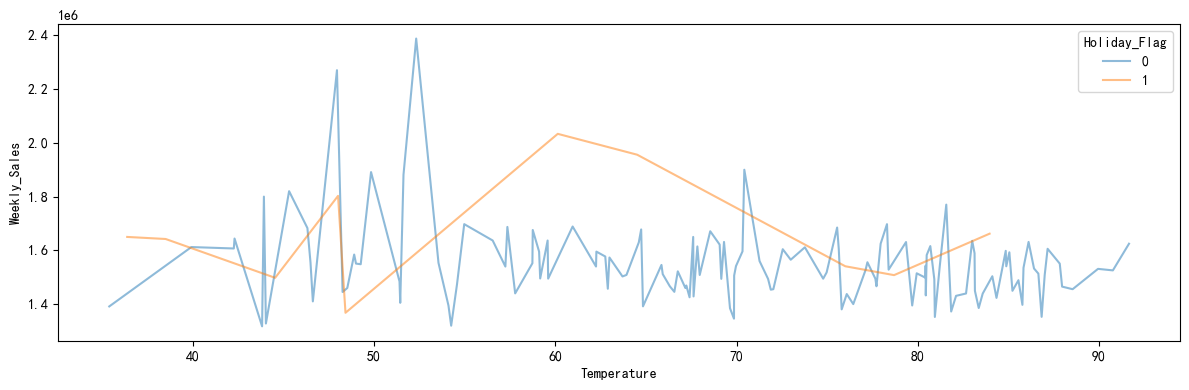

In [68]:
plt.figure(figsize=(12,4))
sns.lineplot(store_1, x="Temperature", y="Weekly_Sales", hue="Holiday_Flag", alpha=0.5)
plt.show()

## 数据分析拟合

In [69]:
import statsmodels.api as sm

In [70]:
lr_wsdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   DateNum       6435 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(5), int64(2)
memory usage: 410.0 KB


为分类变量引入虚拟变量

In [71]:
lr_wsdc_cp = lr_wsdc.copy()

In [72]:
lr_wsdc_cp["Holiday_Flag"] = lr_wsdc_cp["Holiday_Flag"].astype("category")

In [73]:
lr_wsdc_cp = pd.get_dummies(lr_wsdc_cp, columns=["Store", "Holiday_Flag"], dtype="int", drop_first=True)

In [74]:
lr_wsdc_cp.sample(3)

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,DateNum,Store_2,Store_3,Store_4,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
1601,2010-08-20,948447.34,92.81,3.041,126.076645,14.180,196,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,2010-10-15,1459409.10,67.18,2.720,211.813744,7.838,252,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2552,2012-06-01,1118313.70,71.42,3.798,138.113807,8.304,847,0,0,0,...,0,0,0,0,0,0,0,0,0,0


创建自变量x和因变量y

In [75]:
y=lr_wsdc_cp["Weekly_Sales"]
x=lr_wsdc_cp.drop(columns=["Weekly_Sales", "Date", "Fuel_Price"])

查看x相关系数

In [76]:
pd.set_option("display.float_format", "{:.6f}".format)
x.corr().abs() > 0.7

,Temperature,CPI,Unemployment,DateNum,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
Temperature,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CPI,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Unemployment,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
DateNum,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Store_2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Store_3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Store_4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Store_5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Store_6,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Store_7,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


我们将系数阈值设置为0.8，在排查中，相关系数均在0.7以内，说明自变量中间彼此独立，相关度不高。

引入截距

In [77]:
x=sm.add_constant(x)

In [78]:
x

,const,Temperature,CPI,Unemployment,DateNum,Store_2,Store_3,Store_4,Store_5,Store_6,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
0,1.000000,42.310000,211.096358,8.106000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.000000,38.510000,211.242170,8.106000,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.000000,39.930000,211.289143,8.106000,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.000000,46.630000,211.319643,8.106000,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,46.500000,211.350143,8.106000,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,1.000000,64.880000,192.013558,8.684000,966,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6431,1.000000,64.890000,192.170412,8.667000,973,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6432,1.000000,54.470000,192.327265,8.667000,980,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6433,1.000000,56.470000,192.330854,8.667000,987,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


开始建模并fit自主训练

In [79]:
result=sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1492.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:09:04   Log-Likelihood:                -86238.
No. Observations:                6435   AIC:                         1.726e+05
Df Residuals:                    6385   BIC:                         1.729e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.879e+06   3.43e+05      5.484      0.000    1.21e+06    2.55e+06
Temperature     -926.0527    131.875     -7.022      0.000   -1184.572    -667.533
CPI             -534.6949   1630.925     -0.328      0.743   -3731.856    2662.466
Unemployment   -1.957e+04   4803.458     -4.074      0.000    -2.9e+04   -1.02e+04
DateNum           -2.8995     20.820     -0.139      0.889     -43.714      37.915
Store_2         3.705e+05    1.9e+04     19.502      0.000    3.33e+05    4.08e+05
Store_3        -1.156e+06      2e+04    -57.931      0.000    -1.2e+06   -1.12e+06
Store_4         4.549e+05   1.43e+05      3.179      0.001    1.74e+05    7.35e+05
Store_5        -1.262e+06   2.01e+04    -62.877      0.000    -1.3e+06   -1.22e+06
Store_6        -8054.0300   1.98e+04     -0.406      0.685   -4.69e+04    3.08e+04
Store_7        -1.004e+06   4.21e+04    -23.831      0.000   -1.09e+06   -9.21e+05
Store_8        -6.798e+05   2.13e+04    -31.910      0.000   -7.22e+05   -6.38e+05
Store_9        -1.039e+06   2.14e+04    -48.608      0.000   -1.08e+06   -9.97e+05
Store_10        3.158e+05   1.44e+05      2.192      0.028    3.34e+04    5.98e+05
Store_11       -2.017e+05      2e+04    -10.101      0.000   -2.41e+05   -1.63e+05
Store_12       -4.834e+05   1.49e+05     -3.249      0.001   -7.75e+05   -1.92e+05
Store_13        3.762e+05   1.44e+05      2.622      0.009    9.49e+04    6.58e+05
Store_14        4.604e+05   5.29e+04      8.711      0.000    3.57e+05    5.64e+05
Store_15       -9.829e+05   1.34e+05     -7.355      0.000   -1.24e+06   -7.21e+05
Store_16       -1.092e+06   4.12e+04    -26.511      0.000   -1.17e+06   -1.01e+06
Store_17       -7.494e+05   1.43e+05     -5.226      0.000   -1.03e+06   -4.68e+05
Store_18       -5.036e+05   1.34e+05     -3.753      0.000   -7.67e+05   -2.41e+05
Store_19       -1.608e+05   1.34e+05     -1.203      0.229   -4.23e+05    1.01e+05
Store_20        5.321e+05   2.22e+04     23.971      0.000    4.89e+05    5.76e+05
Store_21       -7.986e+05    1.9e+04    -42.039      0.000   -8.36e+05   -7.61e+05
Store_22       -5.714e+05   1.27e+05     -4.487      0.000   -8.21e+05   -3.22e+05
Store_23       -2.818e+05   1.33e+05     -2.123      0.034   -5.42e+05   -2.16e+04
Store_24       -2.386e+05   1.34e+05     -1.782      0.075   -5.01e+05    2.39e+04
Store_25       -8.719e+05   2.22e+04    -39.192      0.000   -9.16e+05   -8.28e+05
Store_26       -6.133e+05   1.34e+05     -4.589      0.000   -8.75e+05   -3.51e+05
Store_27        1.763e+05   1.27e+05      1.385      0.166   -7.32e+04    4.26e+05
Store_28       -1.689e+05   1.49e+05     -1.135      0.256    -4.6e+05    1.23e+05
Store_29       -1.029e+06   1.35e+05     -7.623      0.000   -1.29e+06   -7.64e+05
Store_30       -1.116e+06    1.9e+04    -58.752      0.000   -1.15e+06   -1.08e+06
Store_31    

通过拟合信息，R**2只有0.92，拟合度不高。我们将P>|t|的阈值设置为0.05，但凡超过这个数值的将被删除。其中CPI、DateNum、Store_6、Store_19、Store_24、Store_27、Store_28这些值均大于0.05，删除后再次拟合。

In [80]:
x.drop(columns=["CPI", "DateNum", "Store_6", "Store_19", "Store_24", "Store_27", "Store_28"], inplace=True)

In [81]:
result_2= sm.OLS(y, x).fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1591.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:09:04   Log-Likelihood:                -86507.
No. Observations:                6435   AIC:                         1.731e+05
Df Residuals:                    6392   BIC:                         1.734e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.824e+06   2.11e+04     86.282      0.000    1.78e+06    1.87e+06
Temperature     -922.5692    133.121     -6.930      0.000   -1183.532    -661.606
Unemployment   -3.115e+04   2116.867    -14.713      0.000   -3.53e+04    -2.7e+04
Store_2         3.968e+05   1.53e+04     25.967      0.000    3.67e+05    4.27e+05
Store_3        -1.137e+06   1.55e+04    -73.542      0.000   -1.17e+06   -1.11e+06
Store_4         5.085e+05   1.61e+04     31.527      0.000    4.77e+05     5.4e+05
Store_5        -1.251e+06   1.59e+04    -78.602      0.000   -1.28e+06   -1.22e+06
Store_7        -9.547e+05   1.54e+04    -61.991      0.000   -9.85e+05   -9.25e+05
Store_8        -6.732e+05    1.6e+04    -41.977      0.000   -7.05e+05   -6.42e+05
Store_9        -1.033e+06    1.6e+04    -64.386      0.000   -1.06e+06      -1e+06
Store_10        3.972e+05   1.52e+04     26.160      0.000    3.67e+05    4.27e+05
Store_11       -1.826e+05   1.55e+04    -11.800      0.000   -2.13e+05   -1.52e+05
Store_12        -3.47e+05   1.79e+04    -19.384      0.000   -3.82e+05   -3.12e+05
Store_13        4.419e+05   1.55e+04     28.419      0.000    4.11e+05    4.72e+05
Store_14        5.143e+05   1.51e+04     34.009      0.000    4.85e+05    5.44e+05
Store_15       -9.092e+05   1.52e+04    -59.676      0.000   -9.39e+05   -8.79e+05
Store_16       -1.067e+06    1.6e+04    -66.814      0.000    -1.1e+06   -1.04e+06
Store_17        -6.89e+05   1.59e+04    -43.341      0.000    -7.2e+05   -6.58e+05
Store_18       -4.201e+05   1.52e+04    -27.713      0.000    -4.5e+05    -3.9e+05
Store_20         5.59e+05   1.54e+04     36.361      0.000    5.29e+05    5.89e+05
Store_21       -7.723e+05   1.53e+04    -50.533      0.000   -8.02e+05   -7.42e+05
Store_22       -4.989e+05   1.52e+04    -32.844      0.000   -5.29e+05   -4.69e+05
Store_23       -2.451e+05   1.73e+04    -14.191      0.000   -2.79e+05   -2.11e+05
Store_25        -8.45e+05   1.54e+04    -54.837      0.000   -8.75e+05   -8.15e+05
Store_26        -5.41e+05   1.54e+04    -35.130      0.000   -5.71e+05   -5.11e+05
Store_29       -9.339e+05   1.53e+04    -60.880      0.000   -9.64e+05   -9.04e+05
Store_30        -1.09e+06   1.53e+04    -71.306      0.000   -1.12e+06   -1.06e+06
Store_31       -1.325e+05   1.53e+04     -8.670      0.000   -1.62e+05   -1.03e+05
Store_32       -3.467e+05   1.52e+04    -22.869      0.000   -3.76e+05   -3.17e+05
Store_33       -1.233e+06   1.52e+04    -80.907      0.000   -1.26e+06    -1.2e+06
Store_34       -4.992e+05   1.54e+04    -32.487      0.000   -5.29e+05   -4.69e+05
Store_35       -5.831e+05   1.51e+04    -38.542      0.000   -6.13e+05   -5.53e+05
Store_36       -1.145e+06   1.52e+04    -75.131      0.000   -1.18e+06   -1.12e+06
Store_37       -9.997e+05   1.52e+04    -65.592      0.000   -1.03e+06    -9.7e+05
Store_38    

R-squared决定系数为0.913，0.9以上基本满足拟合优度的要求。

接下来，我们按照lr_wsdc的标准，创建几条数据，来进行预测。

In [82]:
lr_wsdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   DateNum       6435 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(5), int64(2)
memory usage: 410.0 KB


In [83]:
lr_wsdc.sample()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateNum
1042,8,2010-11-19,885608.040000,0,43.860000,2.771000,215.253871,6.433000,287


In [84]:
predict_wsdc = pd.DataFrame({"Store":[3,19,26], "Date":["2025-04-01", "2025-04-02", "2025-04-01"], "Holiday_Flag":[0, 0, 1], "Temperature":[-30.000000, 50.000000, 100.000000], "Fuel_Price":[3.141000, 5.26000, 9.11111], "CPI":[204.888888, 300.111111, 400.111111], "Unemployment":[7.664000, 9.158000, 11.111111]})


In [85]:
predict_wsdc

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,3,2025-04-01,0,-30.000000,3.141000,204.888888,7.664000
1,19,2025-04-02,0,50.000000,5.260000,300.111111,9.158000
2,26,2025-04-01,1,100.000000,9.111110,400.111111,11.111111


In [86]:
predict_wsdc["Date"]=pd.to_datetime(predict_wsdc["Date"])
predict_wsdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         3 non-null      int64         
 1   Date          3 non-null      datetime64[ns]
 2   Holiday_Flag  3 non-null      int64         
 3   Temperature   3 non-null      float64       
 4   Fuel_Price    3 non-null      float64       
 5   CPI           3 non-null      float64       
 6   Unemployment  3 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 300.0 bytes


In [87]:
start_date= predict_wsdc["Date"].min()
predict_wsdc["DateNum"] = (predict_wsdc["Date"]-start_date).dt.days

In [88]:
predict_wsdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         3 non-null      int64         
 1   Date          3 non-null      datetime64[ns]
 2   Holiday_Flag  3 non-null      int64         
 3   Temperature   3 non-null      float64       
 4   Fuel_Price    3 non-null      float64       
 5   CPI           3 non-null      float64       
 6   Unemployment  3 non-null      float64       
 7   DateNum       3 non-null      int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 324.0 bytes


In [89]:
predict_wsdc["Store"] = pd.Categorical(predict_wsdc["Store"], categories=range(1, 46))
predict_wsdc["Holiday_Flag"] = pd.Categorical(predict_wsdc["Holiday_Flag"], categories=[0, 1])

引入虚拟变量

In [90]:
predict_wsdc = pd.get_dummies(predict_wsdc, columns=["Holiday_Flag", "Store"], dtype="int", drop_first=True)

In [91]:
predict_wsdc

,Date,Temperature,Fuel_Price,CPI,Unemployment,DateNum,Holiday_Flag_1,Store_2,Store_3,Store_4,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,2025-04-01,-30.000000,3.141000,204.888888,7.664000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2025-04-02,50.000000,5.260000,300.111111,9.158000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2025-04-01,100.000000,9.111110,400.111111,11.111111,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


引入截距：

In [92]:
predict_wsdc = sm.add_constant(predict_wsdc)

In [102]:
predict_wsdc_1 = predict_wsdc.drop(columns=["Date", "Fuel_Price"])

In [100]:
result.params

const             1879322.544459
Temperature          -926.052717
CPI                  -534.694850
Unemployment       -19571.317569
DateNum                -2.899514
Store_2            370478.526477
Store_3          -1156331.577296
Store_4            454945.650838
Store_5          -1261663.301568
Store_6             -8054.029972
Store_7          -1003972.656997
Store_8           -679759.305967
Store_9          -1039398.536500
Store_10           315843.879076
Store_11          -201683.711704
Store_12          -483378.578845
Store_13           376227.538860
Store_14           460410.841573
Store_15          -982914.591075
Store_16         -1091676.363475
Store_17          -749435.204901
Store_18          -503604.912457
Store_19          -160800.945224
Store_20           532109.213439
Store_21          -798619.146819
Store_22          -571362.933287
Store_23          -281800.249163
Store_24          -238615.907333
Store_25          -871914.143382
Store_26          -613316.654568
Store_27  

predict预测

In [103]:
predict_value = result.predict(predict_wsdc_1)

In [104]:
predict_value

0   2102502.165699
1   2025424.230706
2   1902063.615755
dtype: float64